In [1]:
#used code from https://github.com/pulunghendroprastyo/ann_chiSquare

In [2]:
#imports
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical
from keras.optimizers import adam 
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Almog\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Almog\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Almog\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Almog\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
#Dataset
data=pd.read_csv('wpbc.data')
data = data.round(4)
how_much = data.iloc[: , 1].values
temporary = []
for num in how_much:
    if num == "R":
        temporary.append(1)
    else:
        temporary.append(0)
data = data.drop(data.columns[1], axis=1)
temp = pd.DataFrame(data=temporary, columns=['N'])
data = pd.concat([data ,temp], axis=1)

# Delete the lines with "?" in their features
data = data.drop(data.index[5])
data = data.drop(data.index[26])
data = data.drop(data.index[82])
data = data.drop(data.index[192])

In [4]:
#checking the size of the data
data.shape

(193, 35)

In [5]:
# setting up y label.
y = data[['N']]
y.head(5)

,N
0,0
1,0
2,0
3,1
4,1


In [6]:
# setting up x label, aka the features.
X = data.drop(['N'],axis=1)
X.head(5)

,119513,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,0.07055,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,61,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3.0,2
1,842517,116,21.37,17.44,137.50,1373.0,0.0884,0.1189,0.1255,0.0818,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.0907,2.5,0
2,843483,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,2.0,0
3,843584,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,3.5,0
4,843786,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.1664,0.0767,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.1179,2.5,0


In [7]:
#spliting
x_train, x_test, y_train, y_test = train_test_split(X ,y ,test_size=0.33,random_state=0)
y_train = to_categorical(y_train,num_classes=2)

In [8]:
# the algorithm backpropagation
def backpropagation(x_train,y_train,epochs=150,batch_size=10):
    start_time = datetime.now()
    inputSize = x_train.shape[1]
    model = Sequential()
    model.add(Dense(units=5, input_dim=inputSize)) 
    model.add(Activation('sigmoid'))
    model.add(Dense(units=2)) 
    model.add(Activation('sigmoid'))
    model.compile(loss='categorical_crossentropy',optimizer=adam(lr=0.001),metrics=['accuracy'])
    
    #train NN
    mlp=model.fit(x_train, y_train,epochs=epochs, batch_size=batch_size)
    end_time = datetime.now()
    result_time  =end_time-start_time
    ans = model.predict_classes(x_test,batch_size=1)
    return result_time, ans

    

In [9]:
time, ans = backpropagation(x_train,y_train)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
129/129 [==============================] - 0s 1ms/step - loss: 2.3327 - accuracy: 0.2248
Epoch 2/150
129/129 [==============================] - 0s 93us/step - loss: 2.2704 - accuracy: 0.2248
Epoch 3/150
129/129 [==============================] - 0s 93us/step - loss: 2.2065 - accuracy: 0.2248
Epoch 4/150
129/129 [==============================] - 0s 116us/step - loss: 2.1432 - accuracy: 0.2248
Epoch 5/150
129/129 [==============================] - 0s 108us/step - loss: 2.0806 - accuracy: 0.2248
Epoch 6/150
129/129 [==============================] - 0s 93us/step - loss: 2.0180 - accuracy: 0.2248
Epoch 7/150
129/129 [==============================] - 0s 93us/step - loss: 1.9529 - accuracy: 0.2248
Epoch 8/150
129/129 [==============================] - 0s 101us/step - loss: 1.8896 - accuracy: 0.2248
Epoch 9/150
129/129 [==============================] - 0s 100us/step - loss: 1.8255 - a

In [10]:
print("Duration:",time)

Duration: 0:00:03.182684


In [11]:
#getting the TRUE NEGATIVE,FALSE NEGATIVE,FALSE POSITIVE
CM = confusion_matrix(ans,y_test)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print(classification_report(ans,y_test))

TRUE NEGATIVE (TN): 47
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 0
FALSE POSITIVE (FP): 17
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        64
           1       0.00      0.00      0.00         0

    accuracy                           0.73        64
   macro avg       0.50      0.37      0.42        64
weighted avg       1.00      0.73      0.85        64



C:\Users\Almog\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.6589743589743591, 0.6589743589743591, 0.6512820512820513, 0.7057692307692307, 0.6903846153846154, 0.7057692307692307, 0.6897435897435897, 0.6974358974358974, 0.6820512820512821, 0.7051282051282052, 0.7051282051282052, 0.7128205128205128, 0.7128205128205128, 0.7128205128205128, 0.7134615384615384, 0.7211538461538461, 0.7288461538461539, 0.7211538461538461, 0.7288461538461539, 0.7211538461538461, 0.7211538461538461, 0.7211538461538461, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7288461538461539, 0.7365384615384616, 0.7365384615384616, 0.7365384615384616, 0.7365384615384616, 0.7365384615384616, 0.7365384615384616, 0.7365384615384616]


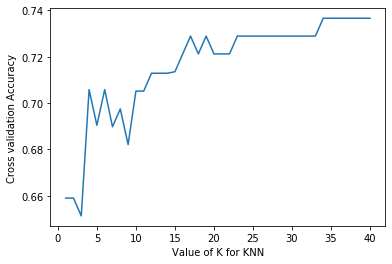

In [12]:

# create the model
knn = KNeighborsClassifier(n_neighbors=1)

# Enter the data training to the mode
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
# print(metrics.accuracy_score(y_test, y_pred))

# using cross validation to get the best percentage of success

k_range = list(range(1, 41))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
# graph of the value of k (x) and the cross validation accuracy
plt.plot(k_range, k_scores)
# names of x and y
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validation Accuracy')
plt.show()